# Plotting code for summary of ICON-ModEx iterations
Note that the results of the Cross Validation (CV) are suspect - there is a *repeating pattern* in some of the results in a process that should be entirely random.

1. I am reporting the `cv_std` of the cross-validation (CV) iterations b/c that's the only measure we have for each individual iteration of the historical ModEx iterations, despite its possible flaws.
2. Some of the `cv_avg` (average over the scores of 5 CV iterations of the same model) and `hold-out` (the score of a single model, the "offical" model of that iteration) differ by considerable amounts.  Therefore, I select the maximum value to plot because they are each different estimates for the accuracy of the model.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
icon_modex_summary = pd.read_csv('ICON_ModEX_summary.csv')

In [3]:
icon_modex_summary

,Job_ID,hold-out,cv_avg,cv_std
0,58356,0.016,0.12100,0.0800
1,60166,-0.591,0.07200,0.1120
2,60207,0.118,0.03600,0.0970
3,60301,0.196,0.01600,0.1720
4,60357,0.250,-0.05900,0.2530
5,60466,0.271,-0.08400,0.2240
6,60501,0.396,0.03930,0.1090
7,60534,0.513,0.03620,0.0789
8,60601,0.353,0.00696,0.0935
9,60629,0.243,0.02501,0.0623


In [4]:
# Compare this column with the full data frame, above.
icon_modex_summary[['hold-out','cv_avg']].max(axis=1)

0     0.121
1     0.072
2     0.118
3     0.196
4     0.250
5     0.271
6     0.396
7     0.513
8     0.353
9     0.243
10    0.254
11    0.241
dtype: float64

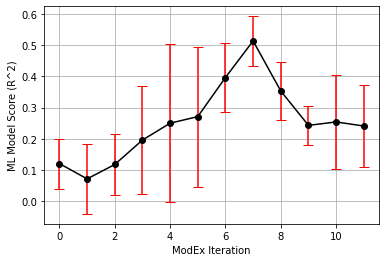

In [8]:
fig, ax = plt.subplots()
plt.errorbar(
    icon_modex_summary.index,
    icon_modex_summary[['hold-out','cv_avg']].max(axis=1),
    yerr=icon_modex_summary['cv_std'],
    fmt='ko-',
    ecolor='r',
    capsize=5)
ax.grid()
plt.ylabel('ML Model Score (R^2)')
plt.xlabel('ModEx Iteration')
plt.savefig('ICON_ModEx_summary.pdf')

**Caption:** Model score for each ModEx iteration starting from the model presented during the Dec. 2021 Community Meeting.  Iterations 1-9 are the model score for a SINGLE SuperLearner stacked ensemble model whose uncertainty is estimated with 5-fold cross-validation (CV). (These error bars should be treated with some suspicion as there are unusual patterns in the CV results.) Iterations 10 and 11 are with the new fully automated ICON-ModEx workflow which trains 10 SuperLearner stacked ensemble models and the values reported here are the average and standard deviation among the 10 models.

The peak at iterations 6-8 falls within the range of uncertainty of model score due to randomly splitting the data between training and testing sets. As far as I know, the SuperLearner configuration did not change during this period. I interpret this plot as showing an initial gain in model score with iterations followed by a plateau at around 0.3.